In [122]:
%matplotlib inline
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import load_iris
from sklearn.gaussian_process import GaussianProcess

In [195]:
births=pd.read_csv('data/births.csv')
births.head()

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548


In [202]:
quartiles=np.percentile(births['births'],[25,50,75])
mu,sig=quartiles[1],0.74*(quartiles[2]-quartiles[0])
births=births.query('(births>@mu -5*@sig)& (births<@mu+5*@sig)')

births['day']=births['day'].astype(int)

births.index=pd.to_datetime(10000*births.year+
                           100*births.month+
                           births.day,format="%Y%m%d")

births_by_date=births.pivot_table('births',[births.index.month,
                                                   births.index.day])
births_by_date.index=[pd.datetime(2012,month,day) 
                      for(month,day) in births_by_date.index]

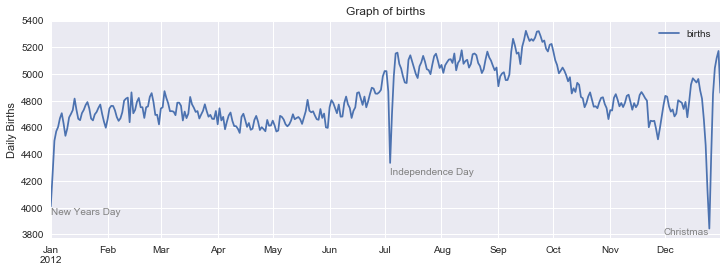

In [213]:
fig,ax=plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)

style=dict(size=10,color='gray')

ax.text('2012-1-1',3950,'New Years Day', **style)
ax.text('2012-7-4',4250,'Independence Day',**style)
ax.text('2012-12-25',3800,'Christmas',**style,ha='right')

ax.set(title="Graph of births",ylabel="Daily Births")
